<a href="https://colab.research.google.com/github/Mendoza-Karen/Projeto-final--primeiro-semestre-2022/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATASET

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dadosconvertidos.xlsx to dadosconvertidos.xlsx


In [ ]:
for fn in uploaded.keys():
  print('Arquivo "{name}" com tamanho de {length} bytes'.format(
  name=fn, length=len(uploaded[fn])))

Arquivo "dadosconvertidos.xlsx" com tamanho de 110736 bytes


In [ ]:
import pandas as pd
import numpy as np
import graphviz

from sklearn.tree import export_graphviz

data = pd.read_excel('dadosconvertidos.xlsx')
data.dropna()
data.tail()
data

,taxaderonco,taxaderespiracao,temperaturadocorpo,movimentodosmembros,oxigenacaodossangue,movimentodosolhos,horasdesono,frequenciacardiaca,niveldeestresse
0,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
1,47.000,16.800,97.200,5.600,95.800,68.00,7.800,52.00,0
2,50.000,18.000,99.000,8.000,97.000,80.00,9.000,55.00,0
3,45.280,16.112,96.168,4.224,95.112,61.12,7.112,50.28,0
4,48.600,17.440,98.160,6.880,96.440,74.40,8.440,53.60,0
...,...,...,...,...,...,...,...,...,...
625,97.760,27.760,87.200,17.880,84.640,102.20,0.000,79.40,4
626,98.592,28.592,88.240,18.296,85.888,103.24,0.000,81.48,4
627,97.024,27.024,86.280,17.512,83.536,101.28,0.000,77.56,4
628,98.144,28.144,87.680,18.072,85.216,102.68,0.000,80.36,4


In [ ]:
df_min_max_scaled = data.copy() 
for column in df_min_max_scaled.columns: 
    if column != 10:
        df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())     


In [ ]:
df_min_max_scaled

,taxaderonco,taxaderespiracao,temperaturadocorpo,movimentodosmembros,oxigenacaodossangue,movimentodosolhos,horasdesono,frequenciacardiaca,niveldeestresse
0,0.056727,0.089143,0.919429,0.166400,0.949867,0.277333,0.916444,0.089143,0.0
1,0.036364,0.057143,0.871429,0.106667,0.920000,0.177778,0.866667,0.057143,0.0
2,0.090909,0.142857,1.000000,0.266667,1.000000,0.444444,1.000000,0.142857,0.0
3,0.005091,0.008000,0.797714,0.014933,0.874133,0.024889,0.790222,0.008000,0.0
4,0.065455,0.102857,0.940000,0.192000,0.962667,0.320000,0.937778,0.102857,0.0
...,...,...,...,...,...,...,...,...,...
625,0.959273,0.840000,0.157143,0.925333,0.176000,0.937778,0.000000,0.840000,1.0
626,0.974400,0.899429,0.231429,0.953067,0.259200,0.960889,0.000000,0.899429,1.0
627,0.945891,0.787429,0.091429,0.900800,0.102400,0.917333,0.000000,0.787429,1.0
628,0.966255,0.867429,0.191429,0.938133,0.214400,0.948444,0.000000,0.867429,1.0


(32 °F − 32) × 5/9 = 0 °C


In [ ]:
Col = data["temperaturadocorpo"]

In [ ]:
Col

0      97.872
1      97.200
2      99.000
3      96.168
4      98.160
        ...  
625    87.200
626    88.240
627    86.280
628    87.680
629    86.880
Name: temperaturadocorpo, Length: 630, dtype: float64

In [ ]:
transformarCelsius = (Col - 32) * 5/9
round(transformarCelsius, 2)

0      36.60
1      36.22
2      37.22
3      35.65
4      36.76
       ...  
625    30.67
626    31.24
627    30.16
628    30.93
629    30.49
Name: temperaturadocorpo, Length: 630, dtype: float64

In [ ]:
dataNormalizada = round(df_min_max_scaled*100,2) 

In [ ]:
dataNormalizada['temperaturadocorpo'] = round(transformarCelsius, 2)

In [ ]:
dataNormalizada

,taxaderonco,taxaderespiracao,temperaturadocorpo,movimentodosmembros,oxigenacaodossangue,movimentodosolhos,horasdesono,frequenciacardiaca,niveldeestresse
0,5.67,8.91,36.60,16.64,94.99,27.73,91.64,8.91,0.0
1,3.64,5.71,36.22,10.67,92.00,17.78,86.67,5.71,0.0
2,9.09,14.29,37.22,26.67,100.00,44.44,100.00,14.29,0.0
3,0.51,0.80,35.65,1.49,87.41,2.49,79.02,0.80,0.0
4,6.55,10.29,36.76,19.20,96.27,32.00,93.78,10.29,0.0
...,...,...,...,...,...,...,...,...,...
625,95.93,84.00,30.67,92.53,17.60,93.78,0.00,84.00,100.0
626,97.44,89.94,31.24,95.31,25.92,96.09,0.00,89.94,100.0
627,94.59,78.74,30.16,90.08,10.24,91.73,0.00,78.74,100.0
628,96.63,86.74,30.93,93.81,21.44,94.84,0.00,86.74,100.0


In [ ]:
teste = dataNormalizada['niveldeestresse'] == 75

In [ ]:
print(teste)

0      False
1      False
2      False
3      False
4      False
       ...  
625    False
626    False
627    False
628    False
629    False
Name: niveldeestresse, Length: 630, dtype: bool


# Gráficos de comparação das colunas com a coluna target.

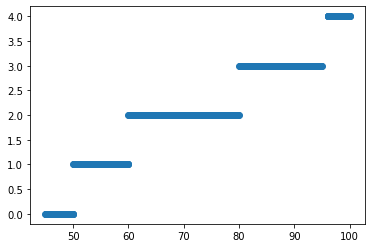

In [ ]:
import matplotlib.pyplot as plt
ronco = data['taxaderonco']
estresse= data['niveldeestresse']

plt.scatter(ronco,estresse)
plt.show()


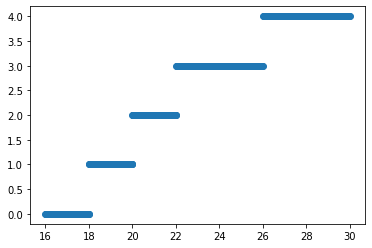

In [ ]:

respiracao = data['taxaderespiracao']
estresse= data['niveldeestresse']

plt.scatter(respiracao,estresse)
plt.show()

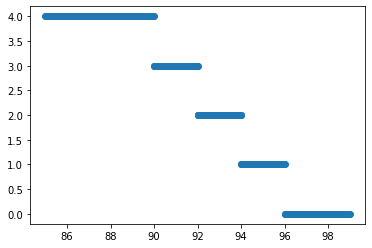

In [ ]:

temperatura = data['temperaturadocorpo']
estresse= data['niveldeestresse']

plt.scatter(temperatura,estresse)
plt.show()

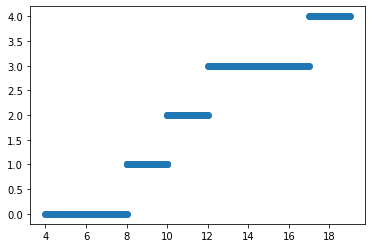

In [ ]:

movimento = data['movimentodosmembros']
estresse= data['niveldeestresse']

plt.scatter(movimento,estresse)
plt.show()

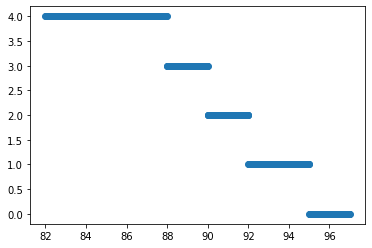

In [ ]:

oxigenio = data['oxigenacaodossangue']
estresse= data['niveldeestresse']

plt.scatter(oxigenio,estresse)
plt.show()

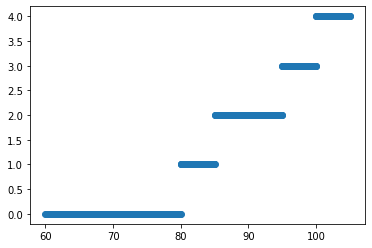

In [ ]:

olhos = data['movimentodosolhos']
estresse= data['niveldeestresse']

plt.scatter(olhos,estresse)
plt.show()

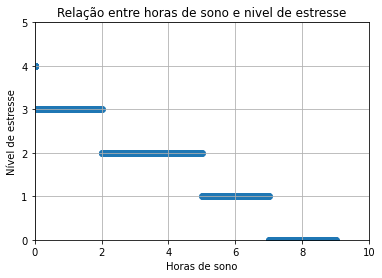

In [ ]:
import matplotlib.pyplot as plt
sono = data['horasdesono']
estresse= data['niveldeestresse']

plt.ylabel('Nível de estresse')
plt.xlabel('Horas de sono')
plt.title('Relação entre horas de sono e nivel de estresse')
plt.xlim(0, 10)
plt.ylim(0, 5)
plt.grid(True)
plt.scatter(sono,estresse)
plt.show()

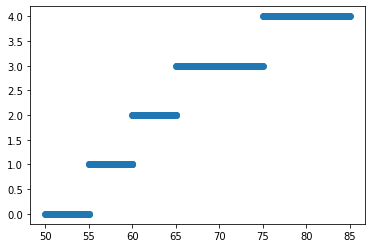

In [ ]:

cardiaco = data['frequenciacardiaca']
estresse= data['niveldeestresse']

plt.scatter(cardiaco,estresse)
plt.show()

# Gráfico da correlação de cada uma das colunas

,taxaderonco,taxaderespiracao,temperaturadocorpo,movimentodosmembros,oxigenacaodossangue,movimentodosolhos,horasdesono,frequenciacardiaca,niveldeestresse
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


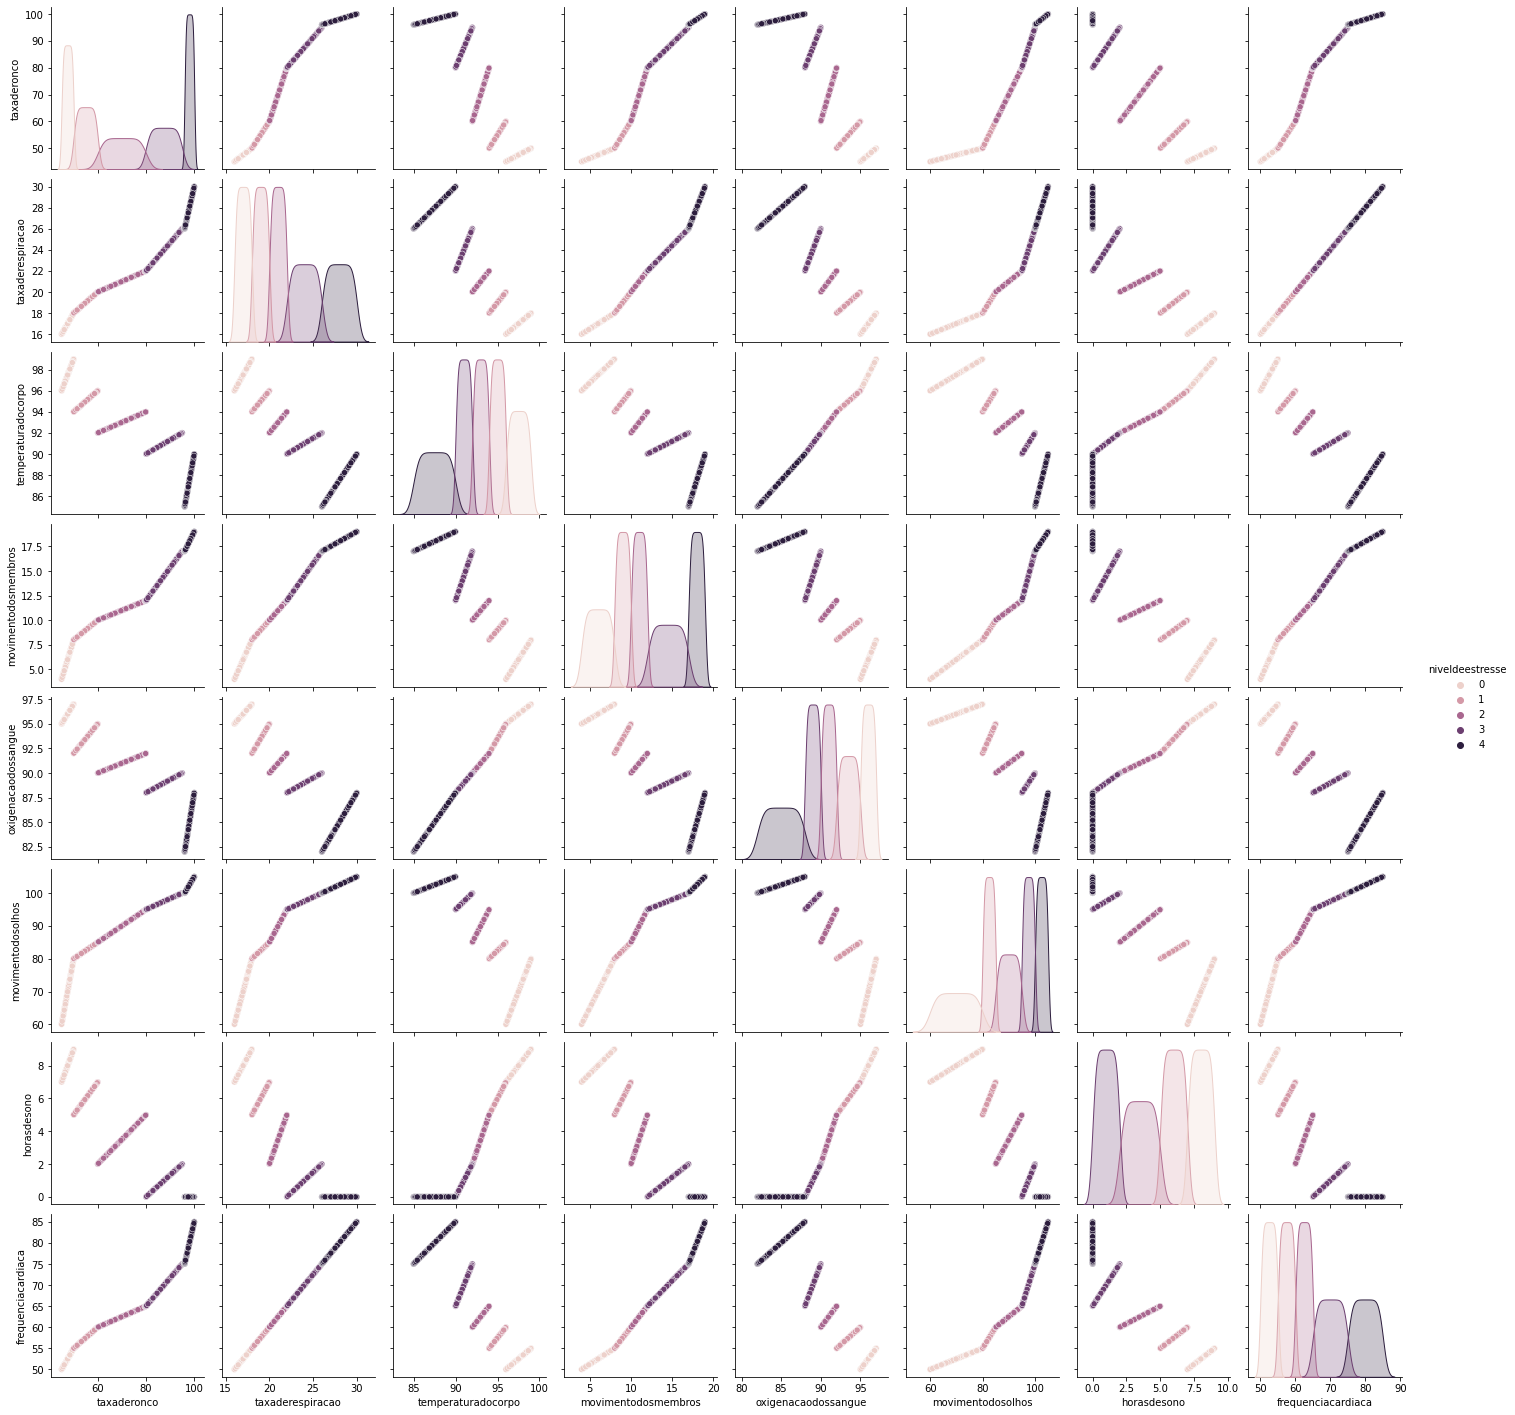

In [ ]:
import seaborn as sns # visualization  
from sklearn.neural_network import MLPClassifier
sns.pairplot( data=data, vars=('taxaderonco','taxaderespiracao','temperaturadocorpo','movimentodosmembros','oxigenacaodossangue','movimentodosolhos',
         'horasdesono','frequenciacardiaca'), hue='niveldeestresse' )  
data.describe()  
  

#X e Y - Treino e Teste

In [ ]:
x= dataNormalizada[['taxaderonco','taxaderespiracao','temperaturadocorpo','movimentodosmembros','oxigenacaodossangue','movimentodosolhos',
         'horasdesono','frequenciacardiaca']]
x.head()


,taxaderonco,taxaderespiracao,temperaturadocorpo,movimentodosmembros,oxigenacaodossangue,movimentodosolhos,horasdesono,frequenciacardiaca
0,5.67,8.91,36.60,16.64,94.99,27.73,91.64,8.91
1,3.64,5.71,36.22,10.67,92.00,17.78,86.67,5.71
2,9.09,14.29,37.22,26.67,100.00,44.44,100.00,14.29
3,0.51,0.80,35.65,1.49,87.41,2.49,79.02,0.80
4,6.55,10.29,36.76,19.20,96.27,32.00,93.78,10.29


In [ ]:
y= dataNormalizada[['niveldeestresse']]
y.head ()

,niveldeestresse
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)

In [ ]:
print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (472, 8)
Tamanho de X_test:  (158, 8)
Tamanho de y_train:  (472, 1)
Tamanho de y_test:  (158, 1)


#Árvore de Decisão e sua matriz de confusão

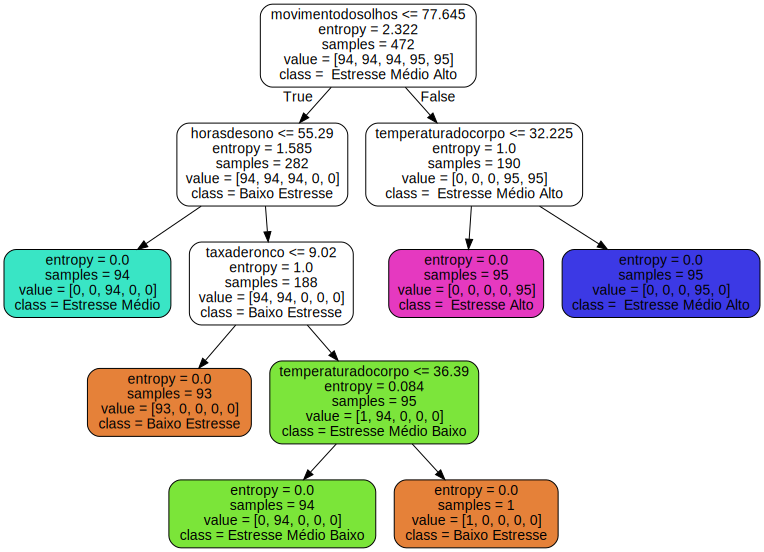

In [ ]:
#import numpy as np
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metrics
#SEED = 5
#np.random.seed(SEED)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)

modeloarv = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
modeloarv.fit(X_train, y_train)
previsoes = modeloarv.predict(X_test)

features = x.columns
target = y.columns
dot_data = export_graphviz(modeloarv, feature_names = features,
                           class_names = ['Baixo Estresse', 'Estresse Médio Baixo', 'Estresse Médio', ' Estresse Médio Alto', ' Estresse Alto'],
                           filled = True, rounded = True)
grafico = graphviz.Source(dot_data)
grafico

In [ ]:
print("\nMatriz de confusão detalhada da Árvore de Decisão:\n",
      pd.crosstab(y_test.values.ravel(), previsoes, rownames=['Real'], colnames=['Predito'], margins=True, margins_name='Todos'))

dic_arv = metrics.classification_report(y_test.values.ravel(), previsoes, target_names=['Baixo Estresse', 'Estresse Médio Baixo', 'Estresse Médio', ' Estresse Médio Alto', ' Estresse Alto'],output_dict=True)
result_arv = dic_arv['accuracy']
print("Acurácia da Árvore de Decisão: ", result_arv)


Matriz de confusão detalhada da Árvore de Decisão:
 Predito  0.0  25.0  50.0  75.0  100.0  Todos
Real                                        
0.0       32     0     0     0      0     32
25.0       0    32     0     0      0     32
50.0       0     0    31     1      0     32
75.0       0     0     0    30      1     31
100.0      0     0     0     0     31     31
Todos     32    32    31    31     32    158
Acurácia da Árvore de Decisão:  0.9873417721518988


In [ ]:
print("Relatório sobre a qualidade:\n")
print(metrics.classification_report(y_test, previsoes, target_names=['Baixo Estresse', 'Estresse Médio Baixo', 'Estresse Médio', ' Estresse Médio Alto', ' Estresse Alto']))

Relatório sobre a qualidade:

                      precision    recall  f1-score   support

      Baixo Estresse       1.00      1.00      1.00        32
Estresse Médio Baixo       1.00      1.00      1.00        32
      Estresse Médio       1.00      0.97      0.98        32
 Estresse Médio Alto       0.97      0.97      0.97        31
       Estresse Alto       0.97      1.00      0.98        31

            accuracy                           0.99       158
           macro avg       0.99      0.99      0.99       158
        weighted avg       0.99      0.99      0.99       158



# KNN e sua matriz de confusão

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

modeloKNN = KNeighborsClassifier(n_neighbors=3)
modeloKNN.fit(X_train, y_train.values.ravel())
predictionsKNN = modeloKNN.predict(X_test)


In [ ]:
print("\nMatriz de confusão detalhada do KNN:\n",
      pd.crosstab(y_test.values.ravel(), predictionsKNN, rownames=['Real'], colnames=['Predito'], margins=True, margins_name='Todos'))

dic_knn = metrics.classification_report(y_test.values.ravel(), predictionsKNN, target_names=['Baixo Estresse', 'Estresse Médio Baixo', 'Estresse Médio', ' Estresse Médio Alto', ' Estresse Alto'],output_dict=True)
result_knn = dic_knn['accuracy']
print("Acurácia do KNN: ", result_knn)


Matriz de confusão detalhada do KNN:
 Predito  0.0  25.0  50.0  75.0  100.0  Todos
Real                                        
0.0       32     0     0     0      0     32
25.0       0    32     0     0      0     32
50.0       0     0    32     0      0     32
75.0       0     0     0    31      0     31
100.0      0     0     0     0     31     31
Todos     32    32    32    31     31    158
Acurácia do KNN:  1.0


# SVM e sua matriz de confusão

In [ ]:
from sklearn import svm

modelosvm = svm.SVC()
modelosvm.fit(X_train, y_train.values.ravel())

predictionsSVM = modelosvm.predict(X_test)

In [ ]:
print("\nMatriz de confusão detalhada do SVM:\n",
      pd.crosstab(y_test.values.ravel(), predictionsSVM, rownames=['Real'], colnames=['Predito'], margins=True, margins_name='Todos'))

dic_svm = metrics.classification_report(y_test.values.ravel(), predictionsSVM, target_names=['Baixo Estresse', 'Estresse Médio Baixo', 'Estresse Médio', ' Estresse Médio Alto', ' Estresse Alto'],output_dict=True)
result_svm = dic_svm['accuracy']
print("Acurácia do SVM: ", result_svm)


Matriz de confusão detalhada do SVM:
 Predito  0.0  25.0  50.0  75.0  100.0  Todos
Real                                        
0.0       32     0     0     0      0     32
25.0       0    32     0     0      0     32
50.0       0     0    32     0      0     32
75.0       0     0     0    31      0     31
100.0      0     0     0     0     31     31
Todos     32    32    32    31     31    158
Acurácia do SVM:  1.0


In [ ]:
print("Relatório sobre a qualidade:\n")
print(metrics.classification_report(y_test, predictionsSVM, target_names=['Baixo Estresse', 'Estresse Médio Baixo', 'Estresse Médio', ' Estresse Médio Alto', ' Estresse Alto']))

Relatório sobre a qualidade:

                      precision    recall  f1-score   support

      Baixo Estresse       1.00      1.00      1.00        32
Estresse Médio Baixo       1.00      1.00      1.00        32
      Estresse Médio       1.00      1.00      1.00        32
 Estresse Médio Alto       1.00      1.00      1.00        31
       Estresse Alto       1.00      1.00      1.00        31

            accuracy                           1.00       158
           macro avg       1.00      1.00      1.00       158
        weighted avg       1.00      1.00      1.00       158



# Comitê dos classificadores

In [ ]:
tot_b = 0
tot_mb = 0
tot_m = 0
tot_ma = 0
tot_a = 0

pred_arv = (modeloarv.predict([[90.4,	70.5,	30.7,	80.0,	50.8,	80.0, 4, 60.6]]))
if pred_arv == 0. :
  tot_b = tot_b + 1
elif pred_arv == 25. :
  tot_mb = tot_mb + 1
elif pred_arv == 50. :
  tot_m = tot_m + 1
elif pred_arv == 75. :
  tot_ma = tot_ma + 1
else:
    tot_a = tot_a + 1
print(pred_arv)

pred_knn = (modeloKNN.predict([[90.4,	70.5,	30.7,	80.0,	50.8,	80.0, 4, 60.6]]))
if pred_knn == 0. :
  tot_b = tot_b + 1
elif pred_knn == 25. :
  tot_mb = tot_mb + 1
elif pred_knn == 50. :
  tot_m = tot_m + 1
elif pred_knn == 75. :
  tot_ma = tot_ma + 1
else:
    tot_a = tot_a + 1
print(pred_knn)

pred_svm = (modelosvm.predict([[90.4,	70.5,	30.7,	80.0,	50.8,	80.0, 4, 60.6]]))
if pred_svm == 0. :
  tot_b = tot_b + 1
elif pred_svm == 25. :
  tot_mb = tot_mb + 1
elif pred_svm == 50. :
  tot_m = tot_m + 1
elif pred_svm == 75. :
  tot_ma = tot_ma + 1
else:
    tot_a = tot_a + 1
print(pred_svm)


if tot_b >=2:
  print("Os classificadores declaram que nesse teste o paciente tem nível de baixo estresse(0)")
elif tot_mb >=2:
  print("Os classificadores declaram que nesse teste o paciente tem nível de estresse médio baixo (1)")
elif tot_m >=2:
  print("Os classificadores declaram que nesse teste o paciente tem nível de estresse médio(2)")
elif tot_ma >=2:
  print("Os classificadores declaram que nesse teste o paciente tem nível de estresse médio alto(3)")
elif tot_a >=2:
  print("Os classificadores declaram que nesse teste o paciente tem nível de estresse alto(4)")

if tot_b ==3:
  print("O comitê declara com unanimidade que nesse teste o paciente tem nível de estresse baixo(0)")
elif tot_mb ==3:
  print("O comitê declara com unanimidade que nesse teste o paciente tem nível de estresse médio baixo(1)")
elif tot_m ==3:
  print("O comitê declara com unanimidade que nesse teste o paciente tem nível de estresse médio(2)")
elif tot_ma ==3:
  print("O comitê declara com unanimidade que nesse teste o paciente tem nível de estresse médio alto(3)")
elif tot_a ==3:
  print("O comitê declara com unanimidade que nesse teste o paciente tem nível de estresse alto(4)")


[100.]
[75.]
[75.]
Os classificadores declaram que nesse teste o paciente tem nível de estresse médio alto(3)
